In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tables import *
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

In [49]:
# Here I assign height and width
image_height= 12
image_width= 22

# Assign tuple containing the image height and width.
image_shape=(image_height,image_width)

# Here I create  a string variable "datafilename" which contains the name of an HDF5 file
datafilename='B_challenge_8.hdf5'

In [50]:
# Read PCA dataset
ImagesFile = open_file(datafilename, mode = "r")
ImagesTable=ImagesFile.root.Images.Images

# Check out what kinds of data I have and it's shape
print(ImagesTable.shape[0])
print(type(ImagesTable))
print(ImagesTable)

3000
<class 'tables.table.Table'>
/Images/Images (Table(3000,)) 'Images for B assignment'


(12, 22)


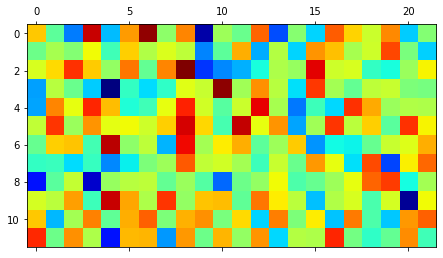

(12, 22)


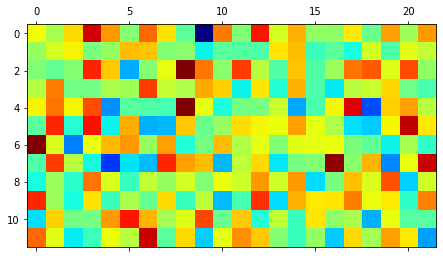

(12, 22)


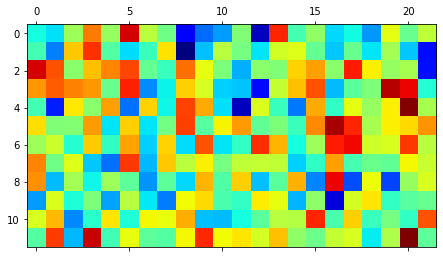

(12, 22)


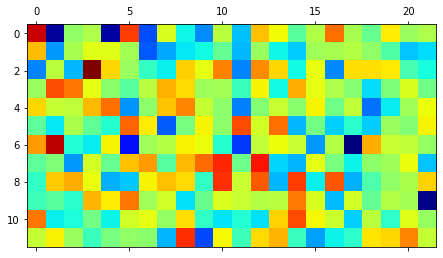

In [51]:
# Start and stop are specified here, you need to process entire dataset!
for x in ImagesTable.iterrows(0,4): 
    print(x['image'].shape)
    plt.matshow(x['image'], interpolation='nearest', cmap=cm.jet)
    plt.show()

In [52]:
# Read PCA dataset
ImagesFile = open_file(datafilename, mode = "r")
ImagesTable=ImagesFile.root.Images.Images


# ImagesTable object is a reference to the Images dataset within the file.
print(ImagesTable.shape)
print(type(ImagesTable))
print(ImagesTable)

(3000,)
<class 'tables.table.Table'>
/Images/Images (Table(3000,)) 'Images for B assignment'


In [53]:
# Length is defined as the product of image_height and image_width,
# which represents the total number of pixels in an image. 
length = image_height * image_width
print(ImagesTable.shape[0])

# This is useful to know to ensure that the new array has the correct dimensions to store all the images.
number_of_images = ImagesTable.shape[0]

# new_array will be used to store the flattened representation of each image.
new_array = np.zeros((number_of_images, length))
print(new_array.shape)

3000
(3000, 264)


(792000,)


(array([1.0000e+00, 2.0000e+00, 2.0000e+00, 1.3000e+01, 1.5000e+01,
        4.0000e+01, 6.5000e+01, 1.4700e+02, 3.5000e+02, 8.6400e+02,
        1.8840e+03, 4.0310e+03, 8.0830e+03, 1.4933e+04, 2.5850e+04,
        4.0600e+04, 5.8125e+04, 7.5511e+04, 8.8719e+04, 9.6892e+04,
        9.4566e+04, 8.4416e+04, 6.8521e+04, 5.0388e+04, 3.4325e+04,
        2.0843e+04, 1.1499e+04, 6.0780e+03, 2.9320e+03, 1.2450e+03,
        6.2600e+02, 2.2900e+02, 1.2400e+02, 4.7000e+01, 2.0000e+01,
        4.0000e+00, 5.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-19.92917031, -18.92435549, -17.91954067, -16.91472584,
        -15.90991102, -14.9050962 , -13.90028137, -12.89546655,
        -11.89065173, -10.88583691,  -9.88102208,  -8.87620726,
         -7.87139244,  -6.86657761,  -5.86176279,  -4.85694797,
         -3.85213314,  -2.84731832,  -1.8425035 ,  -0.83768867,
          0.16712615,   1.17194097,   2.1767558 ,   3.18157062,
          4.18638544,   5.19120026,   6.19601509,   7.20082991,
      

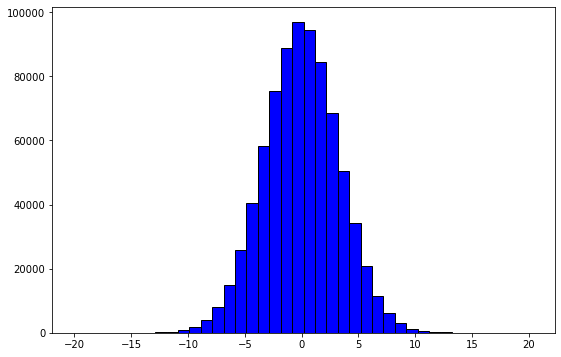

In [54]:
# I iterate over each row of the ImagesTable dataset. 
i=0
for unflattened_array in ImagesTable.iterrows():
    # This line flattens the 2D pixel array for the current image into a 1D array and stores it in the new_array variable. 
    new_array[i] = unflattened_array['image'].flatten()
    i=i+1

# This line flattens the 2D array new_array into a 1D array new_array_fl.
# This will be useful for visualizing the distribution of pixel values across all images.
new_array_fl = new_array.flatten()
print(new_array_fl.shape)

# Plot histogram
plt.figure(figsize=(9,6))
plt.hist(new_array_fl, bins=40, color = 'blue', edgecolor = 'black')

## <div align="center">PCA or ICA ?!</div>

The histogram is unimodal (single peak), the data is concentrated around a central value. I can define whether to use PCA or ICA by comparing the variance and reconstruction error.

In [55]:
# Perform PCA on the data

# Initialize PCA using sklearn library 
ica = FastICA(n_components=10)

# This applies the PCA analysis on the new_array and returns the transformed data in data_PCA variable. 
data_ICA = ica.fit_transform(new_array)
print(data_PCA.shape)

(3000, 10)


In [56]:
# Get the inverse matrix 
data_reconstructed = pca.inverse_transform(data_ICA)

# compute reconstruction error as mean squared error
reconstruction_error = np.mean((new_array - data_reconstructed)**2)

# compute variance of the original data
variance = np.var(new_array)
print("Variance of the original data:", variance)
print("Reconstruction error:", reconstruction_error)

# compare the reconstruction error to the variance
if reconstruction_error < variance:
    print("The reconstruction error is much smaller than the variance.")
else:
    print("The reconstruction error is close to or larger than the variance.")

Variance of the original data: 10.86381504029563
Reconstruction error: 9.848372700433083
The reconstruction error is much smaller than the variance.


The reconstruction error is much smaller than the variance same as for the PCA test that I already done. Thus, in my case the test based on reconstruction error does not work and cannot give a green light for PCA nor ICA.

Another approach is just run PCA and ICA for the data and analyse the result. So, I will do this for the data that I have in this Jupyter Notebook - I will run ICA and see the output.

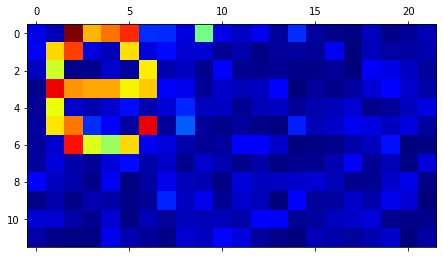

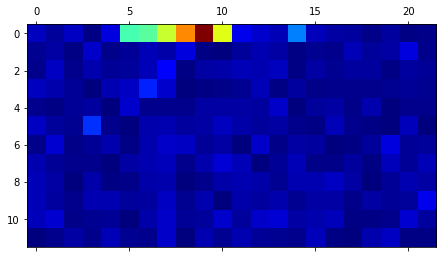

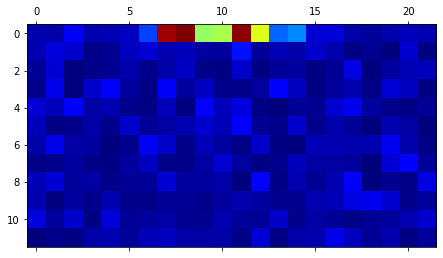

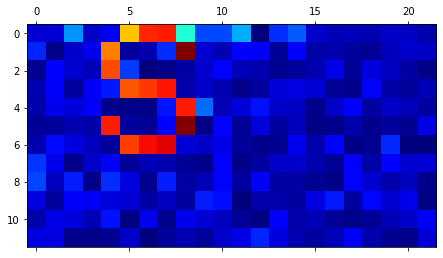

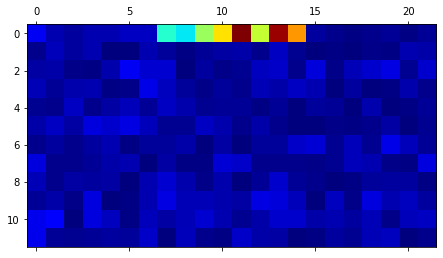

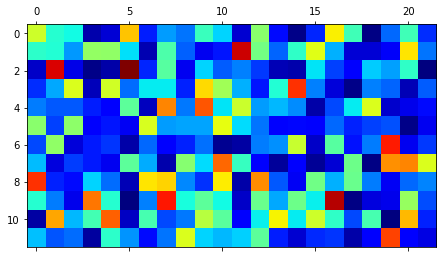

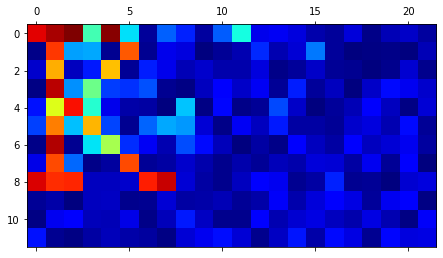

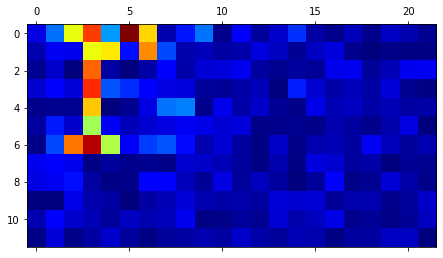

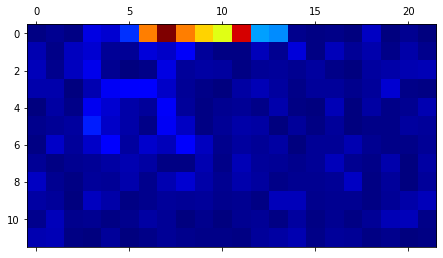

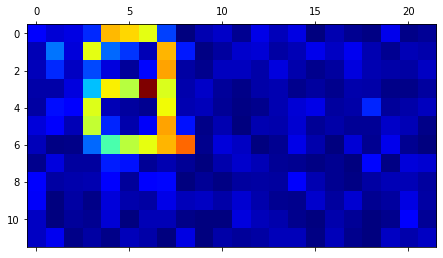

In [57]:
# Each iteration of the loop corresponds to a principal component. n_components = 10 that's why we iterate 10 times.
for k in range(0,10):
    # Here I compute principal component and reshapes it into a 2D image with the original dimensions image_height and image_width.
    output = np.abs(ica.components_[k,:]).reshape((image_height, image_width))
    # Plot the result
    plt.matshow(output, interpolation='nearest', cmap=cm.jet)
    plt.show()

The output is - Keras

### The ICA worked well, therefore no need to try PCA.